In [3]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df = df.drop(['beats'], axis=1)

In [6]:
df.head()

,class_name,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues,103.359375,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues,95.703125,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues,151.999081,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues,184.570312,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues,161.499023,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


## Visualizing the features

<IPython.core.display.Javascript object>


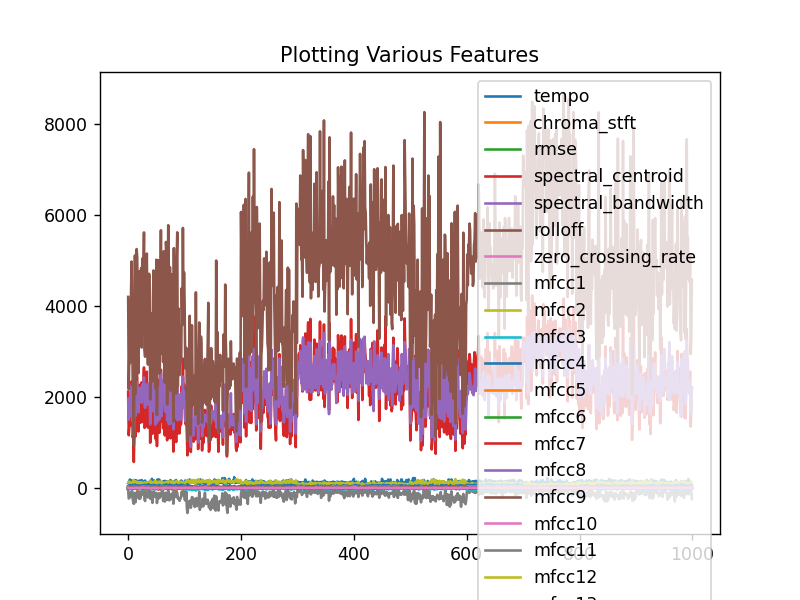

Text(0.5, 1.0, 'Plotting Various Features')

In [7]:
df.plot()
plt.title("Plotting Various Features")

# Preprocesing

In [8]:
df['class_name'].unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [9]:
df['class_name'] = df['class_name'].astype('category')
df['class_label'] = df['class_name'].cat.codes

In [10]:
lookup_genre_name = dict(zip(df.class_label.unique(), df.class_name.unique()))   
lookup_genre_name

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [11]:
df['class_name'].unique()

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Categories (10, object): ['blues', 'classical', 'country', 'disco', ..., 'metal', 'pop', 'reggae', 'rock']

In [12]:
cols = list(df.columns)
cols.remove('label')
cols.remove('class_label')
cols.remove('class_name')
#df[cols]

# Data Splitting

In [13]:
X = df.iloc[:,1:28]
y = df['class_label']

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X)

In [15]:
X1

array([[0.26888889, 0.42391619, 0.61870192, ..., 0.47309965, 0.32940648,
        0.64735102],
       [0.22633745, 0.27383326, 0.27550245, ..., 0.34871957, 0.65743834,
        0.54743444],
       [0.53921569, 0.16613743, 0.37250229, ..., 0.00937433, 0.22533064,
        0.18547223],
       ...,
       [0.26888889, 0.40881605, 0.51807597, ..., 0.40700145, 0.4169248 ,
        0.42905771],
       [0.31884058, 0.35114506, 0.44530499, ..., 0.3681927 , 0.49131954,
        0.46850146],
       [0.11683007, 0.38291908, 0.09604221, ..., 0.42327252, 0.42644767,
        0.44510903]])

In [16]:
X

,tempo,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,103.359375,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,...,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987
1,95.703125,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,...,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485
2,151.999081,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,...,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260
3,184.570312,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,...,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607
4,161.499023,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,...,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,123.046875,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,105.403012,-43.945538,...,-15.174259,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201
996,117.453835,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,89.522283,-33.497073,...,-16.957086,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224
997,103.359375,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,134.443879,1.027332,...,-6.700004,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677
998,112.347147,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,136.611573,-46.700574,...,-12.647550,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148


# Feature importance using Random Forest

<IPython.core.display.Javascript object>


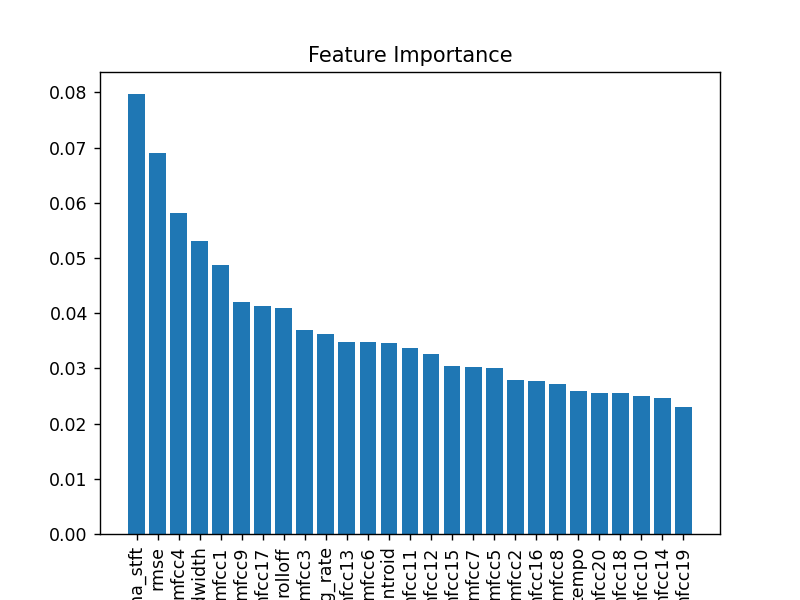

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0, n_jobs=-1).fit(X1,y)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [18]:
rf.score(X1, y)

0.999

# Feature importance using Decision Tree

<IPython.core.display.Javascript object>


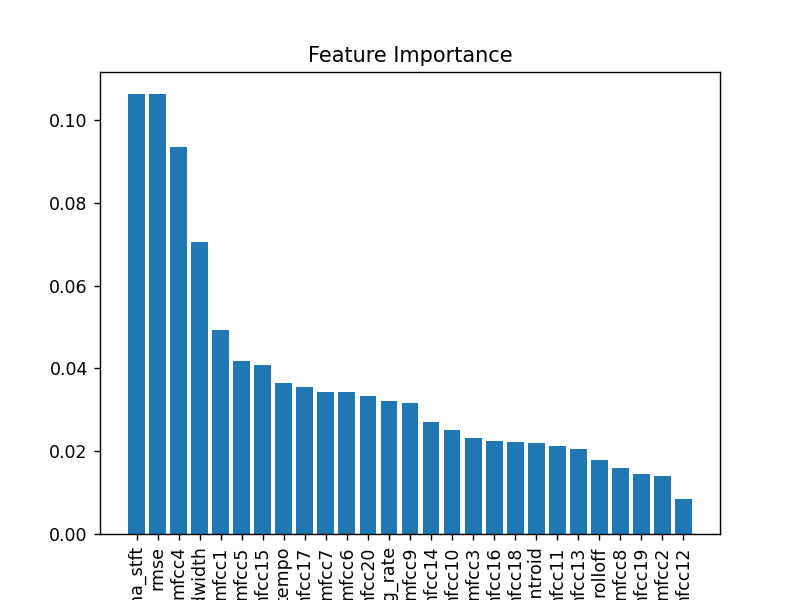

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0).fit(X1, y)
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X.columns.values[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [20]:
dt.score(X1, y)

0.999

# K-Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X1, y)
knn.score(X1,y)

0.745

# Predicting using Random forest, Decision Tree,KNN

In [22]:
import sys
sys.path.insert(0,'C:\\Users\\SAI\\Desktop\\Music-Genre-Classification-Django-master\\predictor')
from Metadata import getmetadata
a = getmetadata("disco1.wav")

## Here We have converted a (.wav) file into the array format using metadata.ipynb file.

### Now Let's predict the output using all the 3 models

In [23]:
d1 =np.array(a)
data1 = scaler.transform([d1])
genre_prediction = knn.predict(data1)
print(lookup_genre_name[genre_prediction[0]])

disco


In [24]:
d2 =np.array(a)
data2 = scaler.transform([d2])
genre_prediction = dt.predict(data2)
print(lookup_genre_name[genre_prediction[0]])

disco


In [25]:
d3 =np.array(a)
data3 = scaler.transform([d3])
genre_prediction = rf.predict(data3)
print(lookup_genre_name[genre_prediction[0]])

disco


### Based on accuracy and the correctness of output for the above example, We are considering Random Forest For deployment

In [27]:
import pickle

In [30]:
with open('abcd.pkl','wb') as file:
    pickle.dump(rf,file)
    

